In [ ]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [ ]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [1]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
#Call data
df = pd.read_csv("exoplanet_data.csv")
#Know data
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [4]:
#Let's see which kind of data is in each column
print(df.dtypes)

koi_disposition       object
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq                int64
koi_insol            float64
koi_insol_err1       float64
koi_insol_err2       float64
koi_model_snr        float64
koi_tce_plnt_num       int64
koi_steff              int64
koi_steff_err1         int64
koi_steff_err2         int64
koi_slogg            float64
koi_slogg_err1       float64
koi_slogg_err2

In [5]:
#The first important thing is to know which labels are in column koi_disposition
df.koi_disposition.unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

Since we have three possible labels it might not be wize to use a binomial regression (logistic). Let's see haow does data is distributed in an histrogram.

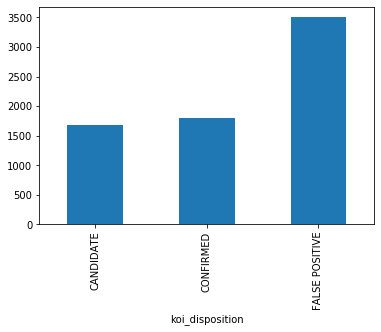

In [8]:
df.groupby('koi_disposition').size().plot(kind='bar')

In [7]:
#lETS GET THE CORRELATION BETWEEN NUMERIC VARIABLES
#Calculamos la correlación entre variables tipo numéricas
df.corr()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
koi_fpflag_nt,1.000000,-0.241148,0.003062,0.050790,0.408724,0.353231,-0.353231,0.249381,0.250697,-0.250697,...,-0.149565,-0.128576,0.053214,-0.140248,0.045535,0.098100,-0.062283,0.030920,-0.046510,-0.101643
koi_fpflag_ss,-0.241148,1.000000,0.144516,0.101695,-0.155964,-0.134208,0.134208,-0.111469,-0.177043,0.177043,...,-0.185036,-0.053394,0.118900,-0.061800,0.032638,0.030783,-0.034283,0.088010,-0.053471,-0.006009
koi_fpflag_co,0.003062,0.144516,1.000000,0.538280,-0.164792,-0.084351,0.084351,-0.121452,-0.023107,0.023107,...,-0.121247,-0.012101,-0.019921,-0.057406,0.032129,0.029239,-0.016611,0.159988,-0.094027,0.067023
koi_fpflag_ec,0.050790,0.101695,0.538280,1.000000,-0.138946,-0.079903,0.079903,-0.099760,0.013635,-0.013635,...,-0.083607,0.003066,-0.006111,-0.052307,0.022411,0.030085,-0.011970,0.069693,-0.045495,0.047932
koi_period,0.408724,-0.155964,-0.164792,-0.138946,1.000000,0.674842,-0.674842,0.655186,0.272529,-0.272529,...,-0.036036,-0.055410,-0.006147,-0.168086,0.017590,0.041289,-0.008776,-0.030675,0.011226,-0.045959
koi_period_err1,0.353231,-0.134208,-0.084351,-0.079903,0.674842,1.000000,-1.000000,0.469613,0.472034,-0.472034,...,-0.055134,-0.014447,0.005737,-0.140277,0.015100,0.033152,-0.008890,-0.005353,0.007145,-0.034097
koi_period_err2,-0.353231,0.134208,0.084351,0.079903,-0.674842,-1.000000,1.000000,-0.469613,-0.472034,0.472034,...,0.055134,0.014447,-0.005737,0.140277,-0.015100,-0.033152,0.008890,0.005353,-0.007145,0.034097
koi_time0bk,0.249381,-0.111469,-0.121452,-0.099760,0.655186,0.469613,-0.469613,1.000000,0.162845,-0.162845,...,-0.030101,-0.001929,-0.031890,-0.107467,-0.004831,0.006444,0.011434,-0.016981,0.010483,0.021898
koi_time0bk_err1,0.250697,-0.177043,-0.023107,0.013635,0.272529,0.472034,-0.472034,0.162845,1.000000,-1.000000,...,-0.056111,-0.046285,0.035131,-0.116730,0.047142,0.068065,-0.042652,-0.003804,-0.009188,-0.041119
koi_time0bk_err2,-0.250697,0.177043,0.023107,-0.013635,-0.272529,-0.472034,0.472034,-0.162845,-1.000000,1.000000,...,0.056111,0.046285,-0.035131,0.116730,-0.047142,-0.068065,0.042652,0.003804,0.009188,0.041119


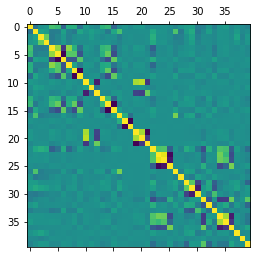

In [9]:
#Let's make a visual representation
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()

The correlation between variables is not significant, except for some pairs, as shown in the plot ans in the correlation matrix (linear correlations). Perhaps it would be useful to take out the error columns (Uncertainties Columns), which might not be usesul to classify an object as a Exoplanet. Next, lets explore the descriptive statistics of this variables before removimg any of them.

In [11]:
df.describe()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6.991000e+03,6.991000e+03,6991.000000,6991.000000,6991.000000,...,6991.000000,6991.000000,6991.000000,6991.00000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000
mean,0.157059,0.244743,0.202975,0.125018,56.191248,1.851122e-03,-1.851122e-03,164.488820,0.009340,-0.009340,...,-161.206980,4.305049,0.121091,-0.14048,1.740749,0.352710,-0.388568,292.082406,43.812143,14.271508
std,0.363882,0.429966,0.402243,0.330763,117.570962,7.184503e-03,7.184503e-03,67.020475,0.021989,0.021989,...,71.448481,0.439238,0.132048,0.08199,5.903415,0.839017,1.907797,4.762908,3.606167,1.350802
min,0.000000,0.000000,0.000000,0.000000,0.259820,1.100000e-08,-1.568000e-01,120.515914,0.000009,-0.569000,...,-1733.000000,0.047000,0.000000,-1.00700,0.109000,0.000000,-103.825000,279.856080,36.577381,6.966000
25%,0.000000,0.000000,0.000000,0.000000,2.620126,5.005000e-06,-2.401000e-04,132.683917,0.001145,-0.010000,...,-197.000000,4.209000,0.044000,-0.19500,0.829000,0.128000,-0.252000,288.704730,40.797760,13.455000
50%,0.000000,0.000000,0.000000,0.000000,8.947426,3.300000e-05,-3.300000e-05,136.739230,0.003990,-0.003990,...,-159.000000,4.436000,0.070000,-0.12700,0.999000,0.248000,-0.111000,292.314760,43.679661,14.534000
75%,0.000000,0.000000,0.000000,0.000000,34.282605,2.401000e-04,-5.005000e-06,169.937005,0.010000,-0.001145,...,-112.000000,4.543000,0.149000,-0.08800,1.357000,0.357000,-0.069000,295.888550,46.693659,15.322000
max,1.000000,1.000000,1.000000,1.000000,1071.232624,1.568000e-01,-1.100000e-08,1472.522306,0.569000,-0.000009,...,0.000000,5.364000,1.472000,0.00000,180.013000,25.956000,0.000000,301.720760,52.336010,19.065000


As shown above there is a very high magnituude difference between variables.

# Select your features (columns)

In [12]:
#Let's extract column names
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [13]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_impact','koi_duration',
       'koi_depth', 'koi_prad','koi_teq', 'koi_insol', 
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_slogg', 'koi_srad', 
        'dec','koi_kepmag']]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [16]:
#In order to use scikit-learn it is necessary to transform the pandas df to an array 
X =  selected_features.values 
X[0:5]


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.44183827e+01, 1.62513840e+02, 5.86000000e-01, 4.50700000e+00,
        8.74800000e+02, 2.83000000e+00, 4.43000000e+02, 9.11000000e+00,
        2.58000000e+01, 2.00000000e+00, 5.45500000e+03, 4.46700000e+00,
        9.27000000e-01, 4.81416510e+01, 1.53470000e+01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.98991399e+01, 1.75850252e+02, 9.69000000e-01, 1.78220000e+00,
        1.08290000e+04, 1.46000000e+01, 6.38000000e+02, 3.93000000e+01,
        7.63000000e+01, 1.00000000e+00, 5.85300000e+03, 4.54400000e+00,
        8.68000000e-01, 4.81341290e+01, 1.54360000e+01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.73695245e+00, 1.70307565e+02, 1.27600000e+00, 2.40641000e+00,
        8.07920000e+03, 3.34600000e+01, 1.39500000e+03, 8.91960000e+02,
        5.05600000e+02, 1.00000000e+00, 5.80500000e+03, 4.56400000e+00,
        7.91000000e-01

In [17]:
y = df['koi_disposition'].values
y

array(['CONFIRMED', 'FALSE POSITIVE', 'FALSE POSITIVE', ..., 'CANDIDATE',
       'FALSE POSITIVE', 'FALSE POSITIVE'], dtype=object)

In [25]:
#Call module and functio to divide into a trainig set and a test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5592, 19) (5592,)
Test set: (1399, 19) (1399,)


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [27]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_s = scaler.fit_transform(X_train)
X_train_s[0:5]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.51978052e-02, 1.23862922e-02, 5.14850307e-03, 2.14080782e-02,
        5.27958987e-04, 7.41391243e-06, 2.66209262e-02, 1.14546130e-06,
        3.49051706e-03, 0.00000000e+00, 1.17264828e-01, 8.82734912e-01,
        2.96416558e-03, 2.77198689e-01, 6.22966507e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.34322268e-03, 9.60254277e-03, 1.12096502e-03, 2.14427670e-02,
        1.00036619e-04, 7.90817326e-06, 1.13070326e-01, 1.97517171e-04,
        8.99139521e-03, 1.42857143e-01, 2.65961466e-01, 7.96982429e-01,
        8.04383521e-03, 2.92387055e-01, 2.99956503e-01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        6.80806611e-01, 1.38440090e-01, 2.67841200e-04, 1.03929235e-01,
        3.67813598e-04, 1.18622599e-05, 1.00171527e-02, 6.75950047e-08,
        2.12082049e-03, 0.00000000e+00, 2.45636570e-01, 8.25057296e-01,
        6.14357139e-03

In [28]:
X_test_s = scaler.fit_transform(X_test)
X_test_s[0:5]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.11209000e-03, 2.08300446e-02, 4.24168629e-03, 1.34778333e-02,
        1.51162488e-04, 2.89499484e-06, 4.05926527e-02, 7.93427114e-06,
        1.19852406e-03, 1.66666667e-01, 1.31971814e-01, 8.74588816e-01,
        2.21784952e-03, 6.87288112e-01, 7.44288309e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.04866550e-03, 1.85441348e-02, 9.87065352e-03, 2.77452115e-02,
        6.11979063e-02, 2.28504938e-04, 1.07367566e-01, 2.01375484e-04,
        9.77537774e-02, 0.00000000e+00, 3.80747641e-01, 8.12088816e-01,
        4.35232124e-03, 1.55843325e-02, 8.32138419e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.86317681e-03, 2.02637201e-02, 1.59687013e-03, 1.25062429e-02,
        1.03672814e-04, 4.79171560e-06, 1.19240917e-01, 2.91782500e-04,
        1.17159094e-03, 0.00000000e+00, 3.50412039e-01, 8.18667763e-01,
        4.44681608e-03

# Train the Model



In [29]:
#Importamos la librería
#Y cargamos el clasificador que realiza el proceso de KNN
from sklearn.neighbors import KNeighborsClassifier

In [32]:
k = 4
#Entrenamos el modelo  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [33]:
#Predicción
yhat = neigh.predict(X_test)
yhat[0:5]

array(['CANDIDATE', 'FALSE POSITIVE', 'CANDIDATE', 'CANDIDATE',
       'CANDIDATE'], dtype=object)

Evaluación del modelo
En la clasificación multietiquetas, el puntaje de precisión de clasificación es una función que calcula la precisión de subconjuntos. Esta función es la misma que la función jaccard_similarity_score. Escencialmente, calcula que tan cercanas están la etiquetas reales y las de la predicción en el conjunto de prueba.

In [34]:
#Importamis metrics
from sklearn import metrics
print("Precisión del conjunto de entrenamiento: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Precisión del conjunto de prueba: ", metrics.accuracy_score(y_test, yhat))

Precisión del conjunto de entrenamiento:  0.7310443490701002
Precisión del conjunto de prueba:  0.583988563259471


In [36]:
print(f"Training Data Score: {neigh.score(X_train_s, y_train)}")
print(f"Testing Data Score: {neigh.score(X_test_s, y_test)}")

Training Data Score: 0.5016094420600858
Testing Data Score: 0.4996426018584703


Otros valores de K
K en KNN, es el número de vecinos cercanos con los que queremos comparar un dato. Dicha K debe ser especificada por el usuario. Así que, para elegir un buen valor de K es probar con distintos valores de K entrenado para cada K con el conjunto de entrenamiento y calculando para cada K alguna métrica que nos indique la precisión del modelo pero usando datos de prueba, hasta encontrar el modelo con mejor precisión en los datos de prueba

In [38]:
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
#ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])


#Llamamos a mean_acc
mean_acc

array([0.53538242, 0.51179414, 0.56969264, 0.58398856, 0.58541816,
       0.58255897, 0.58613295, 0.59042173, 0.60185847, 0.59756969,
       0.60972123, 0.60400286, 0.6147248 , 0.61115082, 0.60972123,
       0.60543245, 0.6154396 , 0.6161544 , 0.61329521, 0.6147248 ,
       0.61686919, 0.61829878, 0.61972838, 0.62044317, 0.6154396 ,
       0.61758399, 0.61258041, 0.6154396 , 0.6154396 ])

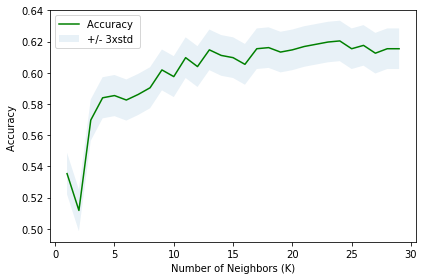

In [39]:
#Graficamos la precisión del modelo para distintos valores de K
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [40]:
#Llamamos al mayor valor de la métrica de precisión y al número de vecinos que les corresponde
print( "La mejor precisión tiene un valor de ", mean_acc.max(), "con k=", mean_acc.argmax()+1)

La mejor precisión tiene un valor de  0.6204431736954967 con k= 24


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [49]:
from sklearn.model_selection import GridSearchCV
# Create the GridSearchCV model
# define the parameter values that should be searched
k_range = list(range(1, 31))


In [50]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [52]:
# instantiate and fit the grid
# # instantiate the grid
grid = GridSearchCV(neigh, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train_s, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=29, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [54]:
# view the complete results (list of named tuples)
grid.cv_results_

{'mean_fit_time': array([0.02279849, 0.02147267, 0.02300129, 0.0206389 , 0.02002571,
        0.02213957, 0.02894213, 0.02282443, 0.02527957, 0.02481732,
        0.02479877, 0.02739649, 0.02899323, 0.02392714, 0.0216599 ,
        0.02690125, 0.0296329 , 0.03087792, 0.02279701, 0.02573845,
        0.02269349, 0.02635496, 0.02443488, 0.02310922, 0.02938662,
        0.02782614, 0.02347045, 0.02280781, 0.0289216 , 0.02340913]),
 'std_fit_time': array([0.00518792, 0.00429985, 0.00472463, 0.00437525, 0.00427649,
        0.00525972, 0.01228759, 0.00500744, 0.01046808, 0.005211  ,
        0.00768574, 0.00503809, 0.01033005, 0.00695099, 0.00565406,
        0.01184071, 0.0099061 , 0.01201189, 0.00576319, 0.00802402,
        0.00609712, 0.00925642, 0.00627905, 0.00480071, 0.00976138,
        0.01200566, 0.00621066, 0.00470913, 0.00958944, 0.0044022 ]),
 'mean_score_time': array([0.06488793, 0.06608415, 0.06914983, 0.0616394 , 0.06007874,
        0.07024105, 0.07883344, 0.07487471, 0.07794452, 0.08

In [56]:
# list comprehension to loop through grid.grid_scores
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)


[0.78737482 0.76984979 0.79077253 0.78397711 0.80078684 0.79560086
 0.80346924 0.80078684 0.80329041 0.80329041 0.80293276 0.80472103
 0.80257511 0.80311159 0.79899857 0.7998927  0.80042918 0.79935622
 0.79971388 0.79774678 0.7998927  0.7998927  0.80114449 0.80007153
 0.80007153 0.79953505 0.80114449 0.7998927  0.80275393 0.7998927 ]


Text(0, 0.5, 'Cross-Validated Accuracy')

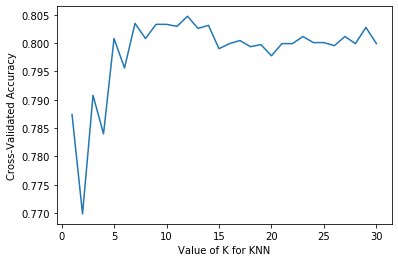

In [57]:
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [58]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8047210300429185
{'n_neighbors': 12}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')


In [59]:
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.787375,0.022228,{'n_neighbors': 1}
1,0.769850,0.014462,{'n_neighbors': 2}
2,0.790773,0.013644,{'n_neighbors': 3}
3,0.783977,0.012952,{'n_neighbors': 4}
4,0.800787,0.010839,{'n_neighbors': 5}
5,0.795601,0.012469,{'n_neighbors': 6}
6,0.803469,0.013808,{'n_neighbors': 7}
7,0.800787,0.013728,{'n_neighbors': 8}
8,0.803290,0.013814,{'n_neighbors': 9}
9,0.803290,0.014414,{'n_neighbors': 10}


# Save the Model

In [61]:
#Lets create the final model
k = 12
#Entrenamos el modelo  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [62]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'knn_aav.sav'
joblib.dump(neigh, filename)

['knn_aav.sav']